<h1>2022.05.18. 강의 시간내 실습</h1>

In [177]:
import pandas as pd

raisin_data = pd.read_csv("C:/ai_dataset/Raisin_Dataset.csv", encoding='latin-1')

Text(0.5, 1.0, 'Class')

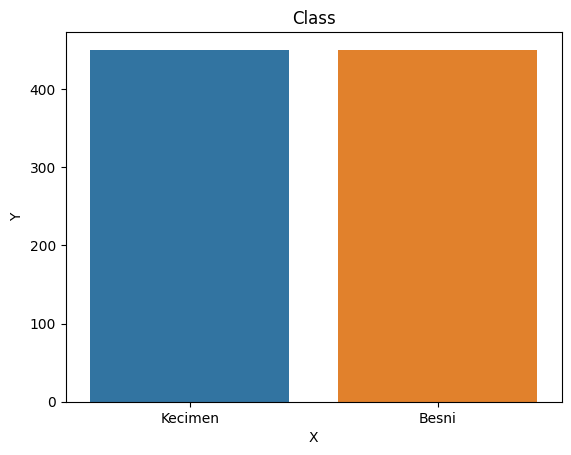

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data = raisin_data, x="Class")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Class")

In [179]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in raisin_data.columns :
    raisin_data[i] = le.fit_transform(raisin_data[i])

In [180]:
raisin_data

,ï»¿Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,551,553,500,558,542,811,544,1
1,404,446,409,469,413,299,453,1
2,583,554,581,448,571,102,573,1
3,74,54,159,108,68,394,66,1
4,462,254,709,33,445,890,382,1
...,...,...,...,...,...,...,...,...
895,504,512,449,542,492,215,461,0
896,549,546,540,508,549,99,577,0
897,640,517,739,174,650,722,656,0
898,600,633,506,683,600,177,622,0


In [181]:
raisin_data.isna().sum()

ï»¿Area            0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [182]:
X = raisin_data.iloc[:,0:7].values
y = raisin_data['Class']

In [183]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

Y = pd.get_dummies(y_encoded).values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [184]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam


model = Sequential()

model.add(Dense(40,input_shape=(7,),activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(Adam(lr=0.001),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 40)                320       
                                                                 
 dense_77 (Dense)            (None, 20)                820       
                                                                 
 dense_78 (Dense)            (None, 8)                 168       
                                                                 
 dense_79 (Dense)            (None, 2)                 18        
                                                                 
Total params: 1,326
Trainable params: 1,326
Non-trainable params: 0
_________________________________________________________________


c:\Users\kkh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [185]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_history=model.fit(x = X_train, y = y_train, epochs=100, batch_size=32, validation_data = (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

Epoch 1/100
23/23 [==============================] - 1s 7ms/step - loss: 0.6845 - accuracy: 0.5833 - val_loss: 0.6266 - val_accuracy: 0.6667
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5911 - accuracy: 0.7778 - val_loss: 0.5401 - val_accuracy: 0.8444
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5241 - accuracy: 0.8292 - val_loss: 0.4764 - val_accuracy: 0.8889
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4662 - accuracy: 0.8458 - val_loss: 0.4053 - val_accuracy: 0.8889
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4112 - accuracy: 0.8569 - val_loss: 0.3520 - val_accuracy: 0.8722
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3734 - accuracy: 0.8542 - val_loss: 0.3273 - val_accuracy: 0.8778
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3562 - accuracy: 0.8528 - val_loss: 0.3166 - val_accuracy: 0.8778
Epoch 8/100
2

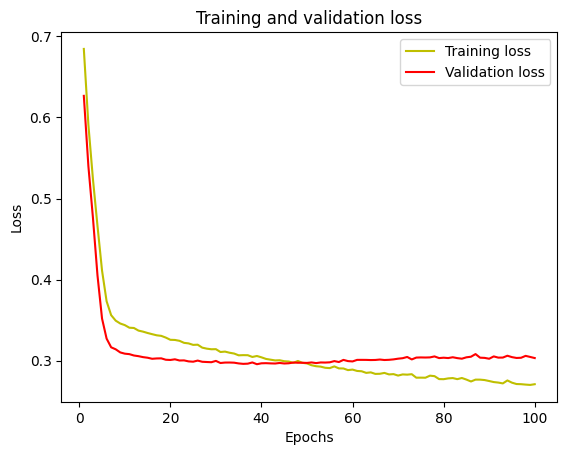

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

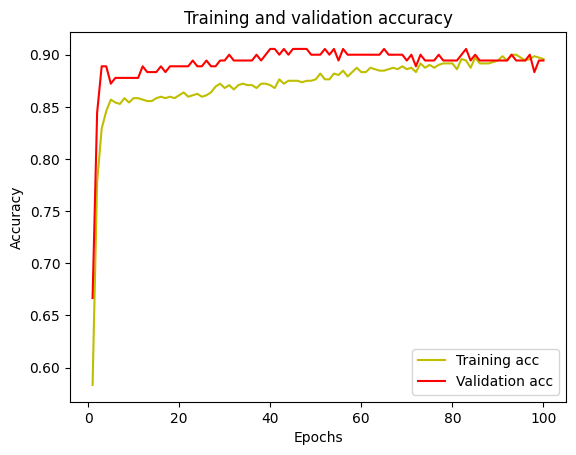

In [187]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()